## ABC Algorithm Performance Check


> ABC Algorithm is used to find optimized solution for multivariable and multimodal functions. The performance of ABC algorithm is determined by the tuning of control parameters. The control parameters that affect the performance are _**MCN (Maximum cycle number)**_, _**initial pouplation SN**_ and _**limit**_.
<br>
<br>
> The ABC algorithm is implemented in python for different sets of control parameters and graphs are plotted to evaluate the performance of ABC algorithm to find the global minima for three benchmark functions: _**Alpine 1 function**_, _**Sphere function**_ and _**Styblinski_Tang function**_

> Reference: http://www.scholarpedia.org/article/Artificial_bee_colony_algorithm and http://mf.erciyes.edu.tr/abc/        


In [1]:
# Reference: http://mf.erciyes.edu.tr/abc/
import math
import numpy as np
from random import *
from datetime import datetime
import matplotlib
import matplotlib.pylab as plt

> Use _**Initialize_Parameters**_ function to change control parameters.
> Values of variables **NP**, **limit** and **MCN** can be changed to tune the control parameters.
> You can change the values of control parameters 
<br>
>> 
``` python
if(value==0):
NP = 50  # Total population size
FoodNumber = int(NP/2) # The number of food source = half of total population
limit = 100 # Trials after which the food source cannot be improved
MCN = 3000 # Number of cycles for foraging
#Decrease the MCN
elif(value == 1):
NP = 50  # Total population size
FoodNumber = int(NP/2) # The number of food source = half of total population
limit = 100 # Trials after which the food source cannot be improved
MCN = 100 # Number of cycles for foraging
#Increase population and decrease MCN
elif(value == 2):
NP = 200  # Total population size
FoodNumber = int(NP/2) # The number of food source = half of total population
limit = 100 # Trials after which the food source cannot be improved
MCN = 100 # Number of cycles for foraging
#Increase population,decrease MCN and decrease limit
elif(value == 3):
NP = 200  # Total population size
FoodNumber = int(NP/2) # The number of food source = half of total population
limit = 10 # Trials after which the food source cannot be improved
MCN = 1000 # Number of cycles for foraging
```

In [4]:
# Initialize all the array values and control parameters. By using the value parameter, you can select 
# different values of control parameters
def Initialize_Parameters(value,benchmark_selection,control_param_set_num,flag):
    #     # Control Parameters required for ABC
    #     NP = 50  # Total population size
    #     FoodNumber = int(NP/2) # The number of food source = half of total population
    #     limit = 100 # Trials after which the food source cannot be improved
    #     MCN = 3000 # Number of cycles for foraging
    # # Control Parameters required for ABC
    global NP # Total population size
    global FoodNumber # The number of food source = half of total population
    global limit # Trials after which the food source cannot be improved
    global MCN # Number of cycles for foraging

    # Constants for ABC
    #global RAND_MAX
    global D #Dimension
    global lb #lower bound of the parameters
    global ub #Upper bound of the parameters
    
    #Foods is the population of food sources. Each row of Foods matrix is a vector holding D parameters to be optimized. 
    #The number of rows of Foods matrix equals to the FoodNumber
    global Foods
    global f # f is a vector holding objective function values associated with food sources */
    #global GlobalMin  #Optimum solution obtained by ABC algorithm
    global GlobalParams #Parameters of the optimum solution

    # New solution (neighbour) produced by v_{ij}=x_{ij}+\phi_{ij}*(x_{kj}-x_{ij}) j is a randomly chosen parameter 
    # and k is a randomluychosen solution different from i*/
    global solution 
    #fitness is a vector holding fitness (quality) values associated with food sources
    global fitness
    # trial is a vector holding trial numbers through which solutions can not be improved
    global trial
    #prob is a vector holding probabilities of food sources (solutions) to be chosen
    global prob
    # Objective function value of new solution
    global ObjValSol
    # Fitness value of new solution
    global FitnessSol 
    # param2change corrresponds to j, neighbour corresponds to k in equation v_{ij}=x_{ij}+\phi_{ij}*(x_{kj}-x_{ij})
    global neighbour
    global param2change
    
    # Select the evaluation for benchamark function
    # 1 for Styblinski_Tang
    # 2 for Alpine1 function
    # 3 for Sphere function
    global benchamark_func

    D = 50 # Dimension
    lb = -5.12 #lower bound of the parameters
    ub = 5.12 # Upper bound of the parameters
    
    if(value==0):
        NP = 50  # Total population size
        FoodNumber = int(NP/2) # The number of food source = half of total population
        limit = 100 # Trials after which the food source cannot be improved
        MCN = 3000 # Number of cycles for foraging
    # Decrease the MCN
    elif(value == 1):
        NP = 50  # Total population size
        FoodNumber = int(NP/2) # The number of food source = half of total population
        limit = 100 # Trials after which the food source cannot be improved
        MCN = 100 # Number of cycles for foraging
    # Increase population and decrease MCN
    elif(value == 2):
        NP = 200  # Total population size
        FoodNumber = int(NP/2) # The number of food source = half of total population
        limit = 100 # Trials after which the food source cannot be improved
        MCN = 100 # Number of cycles for foraging
    # Increase population,decrease MCN and decrease limit
    elif(value == 3):
        NP = 200  # Total population size
        FoodNumber = int(NP/2) # The number of food source = half of total population
        limit = 10 # Trials after which the food source cannot be improved
        MCN = 1000 # Number of cycles for foraging

    # Constants for ABC
        
    #Foods is the population of food sources. Each row of Foods matrix is a vector holding D parameters to be optimized. 
    #The number of rows of Foods matrix equals to the FoodNumber
    Foods = np.zeros(shape =[FoodNumber,D]) 
    f = np.zeros(shape=[FoodNumber])  # f is a vector holding objective function values associated with food sources */
    #fitness is a vector holding fitness (quality) values associated with food sources
    fitness =np.zeros(shape=[FoodNumber])
    # trial is a vector holding trial numbers through which solutions can not be improved
    trial = np.zeros(shape =[FoodNumber])
    #prob is a vector holding probabilities of food sources (solutions) to be chosen
    prob =np.zeros(shape=[FoodNumber]) 
    # New solution (neighbour) produced by v_{ij}=x_{ij}+\phi_{ij}*(x_{kj}-x_{ij}) j is a randomly chosen parameter 
    # and k is a randomluychosen solution different from i*/
    solution =np.zeros(shape=[D]) 
    #global GlobalMin  #Optimum solution obtained by ABC algorithm
    GlobalParams =np.zeros(shape=[D]) #Parameters of the optimum solution
    
    #runtime = 3  #Algorithm can be run many times in order to see its robustness
    
    # Objective function value of new solution
    ObjValSol =0.0
    # Fitness value of new solution
    FitnessSol =0.0 
    # param2change corrresponds to j, neighbour corresponds to k in equation v_{ij}=x_{ij}+\phi_{ij}*(x_{kj}-x_{ij})
    neighbour =0
    param2change =0

    # Select the evaluation for benchamark function
    # 1 for Styblinski_Tang
    # 2 for Alpine1 function
    # 3 for Sphere function
    benchamark_func = benchmark_selection
    
    # Initialize GlobalMins array once in cycles of evaluating parameter sets as it stores all the GlobalMin values
    if(flag==0):
        
        global GlobalMins #GlobalMins holds the GlobalMin of each run in multiple runs 
        # Number of set of values for control parameters
        No_control_parameters_set = control_param_set_num+1

        #GlobalMins holds the GlobalMin of each run in multiple runs 
        #and each set of values of control parameters
        GlobalMins =np.zeros(shape=[No_control_parameters_set,runtime]) 
    
    
# Benchmark function
# Alpine 1 function: Continuous, Differentiable, Non-Scalable, Separable, Multimodal
# f(x) = summation(i=1 to D)(xi*sinxi+0.1*xi)
# The global minimum is located at origin, x =(0,...,0),f(x) = 0
def Alpine1(sol):
    global D
    j=0
    top =0.0
    for j in range (0,D):
        top += abs(sol[j]*math.sin(sol[j])+0.1*sol[j])
    return top

# Sphere Function: Continuous, Differentiable, Separable, Scalable, Multimodal
# f(x) = summation(i=1 to D)(xi^2)
# The global minima is located x= f(0, · · · , 0) = 0,f(x) = 0
def sphere(sol):
    j =0
    top=0.0
    global D
    for j in range (0,D):
        top=top+sol[j]*sol[j]
    return top

# Styblinski-Tang Function: Continuous, Differentiable, Non-Separable, NonScalable,Multimodal
# f(x) = (1/2) * summation(i=1 to D)(xi^4-16xi^2+5xi)
#  The global minimum is located x = f(−2.903534, −2.903534),f(x) = −78.332
def Styblinski_Tang(sol):
    global D
    j=0
    top =0.0
    for j in range (0,D):
        top = 0.5*(top+((math.pow(sol[j],4)-16*math.pow(sol[j],2)+5*sol[j])))
    return top


# Calculate Fitness
# fitm(xm)= 1/1+fm(xm) if fm(xm) >= 0
# or fitm(xm)= 1+abs(fm(xm)) if fm(xm) < 0
def CalculateFitness(fun):

    result=0.0
    if(fun>=0):
        result=1/(fun+1)
    else:
        result=1+math.fabs(fun)
    
    return result
 
# Memorize the best source 
def MemorizeBestSource(globalmin):
    global GlobalMin
    global FoodNumber
    global f
    global Foods
    global GlobalParams
    global D
    
    i =0
    j=0    
    for i in range (0,FoodNumber):
        if (f[i] < globalmin):
            globalmin=f[i]
            GlobalMin = globalmin
            for j in range (0,D):
                GlobalParams[j]=Foods[i][j]

# Variables are initialized in the range [lb,ub]
# Counters of food sources are also initialized in this function
def init(index):
    global Foods
    global ub
    global lb
    global solution
    global benchmark_func
    global f
    global fitness
    global D
    
    j=0
    for j in range (0,D):
        r = random()
        # Intialization definition
        # xmi=li+rand(0,1)∗(ui−li) , where li and ui are the lower and upper bound of the food source xmi , respectively
        Foods[index][j] = r*(ub-lb)+lb
        solution[j]=Foods[index][j]
        
    # Evaluate for benchmark function
    if(benchamark_func==1):
        f[index]=Styblinski_Tang(solution)
    elif(benchamark_func==2):
        f[index]=Alpine1(solution)
    elif(benchamark_func==3):
        f[index]=sphere(solution)
        
    fitness[index]=CalculateFitness(f[index])

#All food sources are initialized 
def initial():
    global GlobalMin
    global GlobalParams
    global FoodNumber
    global f
    global Foods
    global D
    
    i=0
    for i in range (0,FoodNumber):
        init(i)
        
    GlobalMin = f[0]
    for i in range (0,D):
        GlobalParams[i]=Foods[0][i]
        
def SendEmployedBees():
    
    global FoodNumber
    global param2change
    global D
    global neighbour
    global solution
    global Foods
    global lb
    global ub
    global benchamark_func
    global ObjValSol
    global FitnessSol
    global fitness
    global trial
    global f
    
    i =0
    j=0
    
    #Employed Bee Phase
    for i in range (0,FoodNumber): 
        
            # The parameter to be changed is determined randomly
            r = random()
            param2change=(int)(r*D)

            # A randomly chosen solution is used in producing a mutant solution of the solution i*/
            r = random()
            neighbour=(int)(r*FoodNumber)

            # Randomly selected solution must be different from the solution i        
            while(neighbour==i):
                r = random()
                neighbour=(int)(r*FoodNumber)
            
            for j in range (0,D):
                solution[j]=Foods[i][j]

            #v_{ij}=x_{ij}+\phi_{ij}*(x_{kj}-x_{ij})
            #r = random()
            # generate random number between -1 and 1
            r = uniform(-1,1)
            solution[param2change]=Foods[i][param2change]+(Foods[i][param2change]-Foods[neighbour][param2change])*(r-0.5)*2;

            #if generated parameter value is out of boundaries, it is shifted onto the boundaries
            if (solution[param2change]<lb):
                solution[param2change]=lb
                
            if (solution[param2change]>ub):
                solution[param2change]=ub
                
            # Evaluate for 1 benchmark function
            if(benchamark_func==1):
                ObjValSol=Styblinski_Tang(solution)
            elif(benchamark_func==2):
                ObjValSol=Alpine1(solution) 
            elif(benchamark_func==3):
                ObjValSol=sphere(solution)
                
            FitnessSol=CalculateFitness(ObjValSol)

            #a greedy selection is applied between the current solution i and its mutant
            if (FitnessSol>fitness[i]):
            
                #If the mutant solution is better than the current solution i, 
                # replace the solution with the mutant and reset the trial counter of solution i
                
                trial[i]=0
                for j in range (0,D):
                    Foods[i][j]=solution[j]
                
                f[i]=ObjValSol
                fitness[i]=FitnessSol
            
            else:
                # if the solution i can not be improved, increase its trial counter
                trial[i]=trial[i]+1
            

# Calculate probability
# For example prob(i)=fitness(i)/sum(fitness)
# or prob(i)=a*fitness(i)/max(fitness)+b
# probability values are calculated by using fitness values and normalized by dividing maximum fitness value
def CalculateProbabilities():
    global FoodNumber
    global fitness
    global prob
    
    i =0
    maxfit =0.0
    maxfit=fitness[0]
    for i in range (0,FoodNumber): 
        if (fitness[i]>maxfit):
            maxfit=fitness[i] 

    for i in range (0,FoodNumber):
        prob[i]=(0.9*(fitness[i]/maxfit))+0.1

def SendOnlookerBees():
    
    global FoodNumber
    global param2change
    global D
    global neighbour
    global solution
    global Foods
    global lb
    global ub
    global benchamark_func
    global ObjValSol
    global FitnessSol
    global fitness
    global trial
    global f
    global prob
    
    i=0
    j=0
    t=0
    
    # onlooker Bee Phase
    while(t<FoodNumber):
        
        r = random()
        
        # choose a food source depending on its probability to be chosen
        if(r<prob[i]):
            
            t =t+1

            # The parameter to be changed is determined randomly
            r = random()
            param2change=(int)(r*D);

            # A randomly chosen solution is used in producing a mutant solution of the solution i
            r = random()
            neighbour=(int)(r*FoodNumber)

            # Randomly selected solution must be different from the solution i       
            while(neighbour==i):        
                r = random()
                neighbour=(int)(r*FoodNumber)

            for j in range (0,D):
                solution[j]=Foods[i][j]

            # v_{ij}=x_{ij}+\phi_{ij}*(x_{kj}-x_{ij}) 
            #r = random()
            # generate random number between -1 and 1
            r = uniform(-1,1)
            solution[param2change]=Foods[i][param2change]+(Foods[i][param2change]-Foods[neighbour][param2change])*(r-0.5)*2

            # if generated parameter value is out of boundaries, it is shifted onto the boundaries
            
            if (solution[param2change]<lb):
                solution[param2change]=lb
            
            if (solution[param2change]>ub):
                solution[param2change]=ub
                
            # Evaluate for 1 benchmark function
            if(benchamark_func==1):
                ObjValSol= Styblinski_Tang(solution)
            elif(benchamark_func==2):
                ObjValSol=Alpine1(solution) 
            elif(benchamark_func==3):
                ObjValSol=sphere(solution)
  
            FitnessSol=CalculateFitness(ObjValSol)

            # a greedy selection is applied between the current solution i and its mutant
            if (FitnessSol>fitness[i]):

                # If the mutant solution is better than the current solution i, 
                # replace the solution with the mutant and reset the trial counter of solution i
                trial[i]=0
                for j in range (0,D):
                    Foods[i][j]=solution[j]
            
                f[i]=ObjValSol
                fitness[i]=FitnessSol
            
            else:
                
                # if the solution i can not be improved, increase its trial counter
                trial[i]=trial[i]+1
        
        i= i+1
        
        if (i==FoodNumber):
            i=0    
        
# determine the food sources whose trial counter exceeds the "limit" value. In Basic ABC, 
# only one scout is allowed to occur in each cycle
def SendScoutBees():
    global FoodNumber
    global FoodNumber
    global limit
    
    maxtrialindex=0
    i=0

    for i in range (0,FoodNumber):
        if (trial[i]>trial[maxtrialindex]):
            maxtrialindex=i

    if(trial[maxtrialindex]>=limit):
        init(maxtrialindex)

def plot_graph(legend,title):
    global runtime
    global GlobalMins
    global Evaluation_Set_Control_Parameters
   
    x_axis =np.arange(1,runtime+1,1)
    fig = plt.figure(figsize=(10,5))
    for z in range (0,Evaluation_Set_Control_Parameters+1): 
        plt.plot(x_axis, GlobalMins[z],"o-",label=legend[z])
    plt.xlabel('$Run #$')
    plt.ylabel('$Global Min$')
    plt.legend(bbox_to_anchor=(1.5,1),loc='right',ncol=1)
    
    plt.title(title)
    plt.show()

### Execute code for Styblinski - Tang function

$f(x) = \frac{1}{2} \sum_{i=0}^D x_{i}^4-16x_{i}^2+5x_{i}$
<br>
<br>
Global minimum lies at f(x) = -78.332 at x f(−2.903534, −2.903534)

In [5]:
#Main program of the ABC algorithm: Styblinski-Tang function

global GlobalMin
global runtime
global MCN
global GlobalMins
global Evaluation_Set_Control_Parameters
iteration =0
run =0
j=0
mean =0.0
control_parameter_set =0
Evaluation_Set_Control_Parameters = 3
First_Initialization = 0
runtime = 3 #Algorithm can be run many times in order to see its robustness
# Evaluate for Styblinski-Tang Function 
while(control_parameter_set <= Evaluation_Set_Control_Parameters):
    # Run algorithm for "runtime" times
    for run in range (0,runtime):
        Initialize_Parameters(control_parameter_set,1,Evaluation_Set_Control_Parameters,First_Initialization)
        # Set the first time initialization to 1
        First_Initialization = 1
        
        initial()
        MemorizeBestSource(GlobalMin)

        for iteration in range (0,MCN): 
            SendEmployedBees()
            CalculateProbabilities()
            SendOnlookerBees()
            MemorizeBestSource(GlobalMin)
            SendScoutBees()

        print("Run {} for Set {}: {}".format((run+1),(control_parameter_set+1),GlobalMin))
        
        GlobalMins[control_parameter_set][run]=GlobalMin
        mean=mean+GlobalMin

    mean=mean/runtime
    print("Mean of {} runs for Control Parameter set {}: {}".format(runtime,(control_parameter_set+1),mean))

    control_parameter_set += 1
    mean =0.0

Run 1 for Set 1: -78.33233140754214
Run 2 for Set 1: -78.3323314075427
Run 3 for Set 1: -78.33233140754237
Mean of 3 runs for Control Parameter set 1: -78.33233140754241
Run 1 for Set 2: -72.49959558528468
Run 2 for Set 2: -69.40458310057966
Run 3 for Set 2: -77.07723274661274
Mean of 3 runs for Control Parameter set 2: -72.9938038108257
Run 1 for Set 3: -72.47820129840744
Run 2 for Set 3: -75.72456252816164
Run 3 for Set 3: -75.9600007108782
Mean of 3 runs for Control Parameter set 3: -74.72092151248243
Run 1 for Set 4: -77.77058896380916
Run 2 for Set 4: -78.19117128718155
Run 3 for Set 4: -78.22161329792252
Mean of 3 runs for Control Parameter set 4: -78.06112451630442


### Plot for Styblinski - Tang function

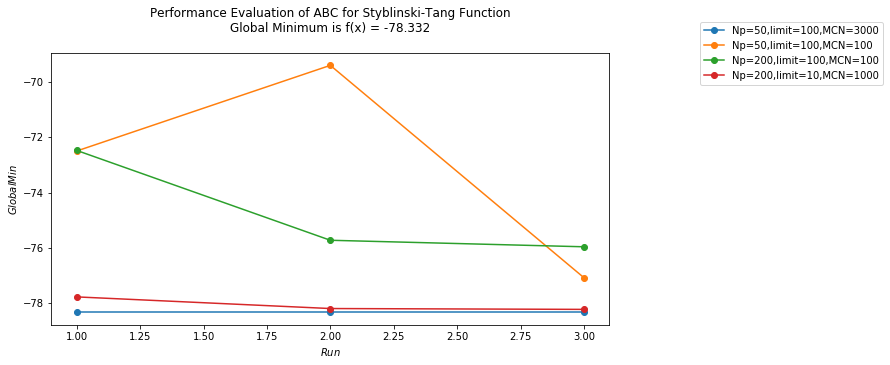

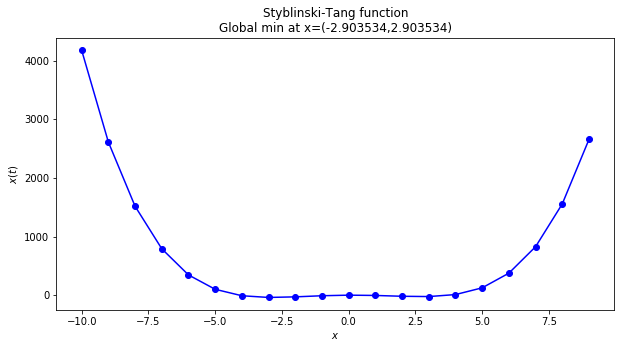

In [6]:
# Plot graph for Styblinski-Tang function
legend =["Np=50,limit=100,MCN=3000","Np=50,limit=100,MCN=100","Np=200,limit=100,MCN=100","Np=200,limit=10,MCN=1000"]
title ="Performance Evaluation of ABC for Styblinski-Tang Function\nGlobal Minimum is f(x) = -78.332\n"
plot_graph(legend,title)

# PLot Styblinski-Tang function
j=-10
x=np.arange(-10,10,1)
top =np.zeros(shape=[20])
sol =0.0
k=0
while(j<10):
    sol = 0.5*((math.pow(j,4)-16*math.pow(j,2)+5*j))
    top[k]=sol
    j=j+1
    k=k+1   
fig = plt.figure(figsize=(10,5))
plt.plot(x, top,'-bo')
plt.xlabel('$x$')
plt.ylabel('$x(t)$')
plt.title("Styblinski-Tang function\nGlobal min at x=(-2.903534,2.903534)")
plt.show()

### Execute for Alpine 1 function
$f(x) = \frac{1}{2} \sum_{i=0}^D | x_{i}sin(x_{i})+0.1x_{i} |$
<br>
<br>
Global minimum lies at f(x) = 0 at x f(0,..,0)

In [7]:
#Main program of the ABC algorithm: Alpine 1 function

global GlobalMin
global runtime
global MCN
global GlobalMins
global Evaluation_Set_Control_Parameters
iteration =0
run =0
j=0
mean =0.0
control_parameter_set =0
Evaluation_Set_Control_Parameters = 3
First_Initialization = 0
runtime = 3 #Algorithm can be run many times in order to see its robustness
# Evaluate for Alpine 1 Function 
while(control_parameter_set <= Evaluation_Set_Control_Parameters):
    # Run algorithm for "runtime" times
    for run in range (0,runtime):
        Initialize_Parameters(control_parameter_set,2,Evaluation_Set_Control_Parameters,First_Initialization)
        # Set the first time initialization to 1
        First_Initialization = 1
        
        initial()
        MemorizeBestSource(GlobalMin)

        for iteration in range (0,MCN): 
            SendEmployedBees()
            CalculateProbabilities()
            SendOnlookerBees()
            MemorizeBestSource(GlobalMin)
            SendScoutBees()

        print("Run {} for Set {}: {}".format((run+1),(control_parameter_set+1),GlobalMin))
        
        GlobalMins[control_parameter_set][run]=GlobalMin
        mean=mean+GlobalMin

    mean=mean/runtime
    print("Mean of {} runs for Control Parameter set {}: {}".format(runtime,(control_parameter_set+1),mean))

    control_parameter_set += 1
    mean =0.0

Run 1 for Set 1: 3.628906186585931e-06
Run 2 for Set 1: 1.4438888507129017e-06
Run 3 for Set 1: 6.969623161873122e-07
Mean of 3 runs for Control Parameter set 1: 1.9232524511620483e-06
Run 1 for Set 2: 16.965089419354705
Run 2 for Set 2: 14.86496783715715
Run 3 for Set 2: 14.035919035085206
Mean of 3 runs for Control Parameter set 2: 15.288658763865689
Run 1 for Set 3: 13.130539740711445
Run 2 for Set 3: 13.997819532665368
Run 3 for Set 3: 14.789777358361665
Mean of 3 runs for Control Parameter set 3: 13.972712210579493
Run 1 for Set 4: 3.5527730771336445
Run 2 for Set 4: 4.096034095044209
Run 3 for Set 4: 4.192801360858416
Mean of 3 runs for Control Parameter set 4: 3.9472028443454232


### Plot for Alpine 1 function

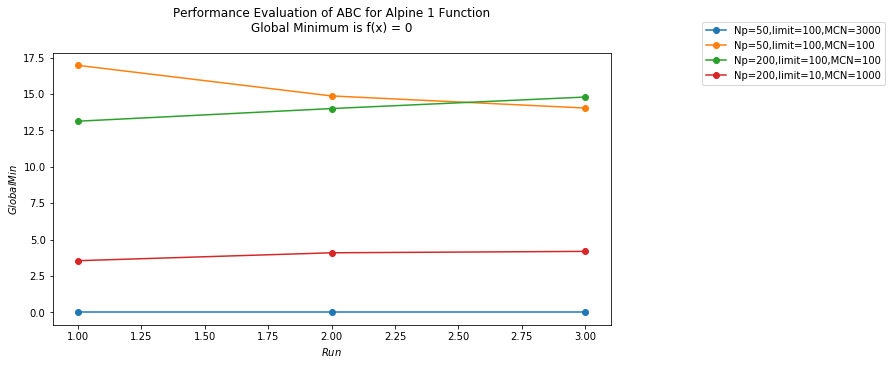

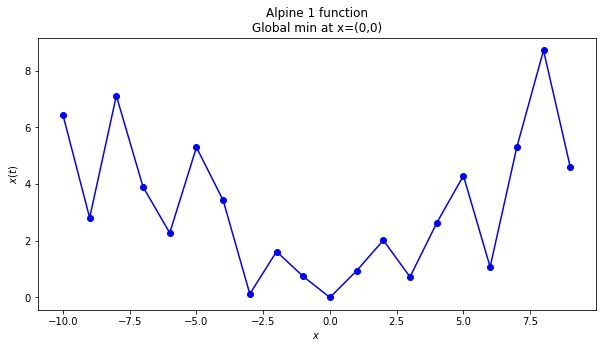

In [8]:
# Plot graph for Alpine 1 function
legend =["Np=50,limit=100,MCN=3000","Np=50,limit=100,MCN=100","Np=200,limit=100,MCN=100","Np=200,limit=10,MCN=1000"]
title ="Performance Evaluation of ABC for Alpine 1 Function\nGlobal Minimum is f(x) = 0\n"
plot_graph(legend,title)

# PLot Alpine 1 function
j=-10
x=np.arange(-10,10,1)
top =np.zeros(shape=[20])
sol =0.0
k=0
while(j<10):
    sol = abs(j*math.sin(j)+0.1*j)
    top[k]=sol
    j=j+1
    k=k+1   
fig = plt.figure(figsize=(10,5))
plt.plot(x, top,'-bo')
plt.xlabel('$x$')
plt.ylabel('$x(t)$')
plt.title("Alpine 1 function\nGlobal min at x=(0,0)")
plt.show()

### Execute for Sphere function
$f(x) = \frac{1}{2} \sum_{i=0}^D (x_{i}^2)$
<br>
<br>
Global minimum lies at f(x) = 0 at x f(0,..,0)

In [9]:
#Main program of the ABC algorithm: Sphere function

global GlobalMin
global runtime
global MCN
global GlobalMins
global Evaluation_Set_Control_Parameters
iteration =0
run =0
j=0
mean =0.0
control_parameter_set =0
Evaluation_Set_Control_Parameters = 3
First_Initialization = 0
runtime = 3 #Algorithm can be run many times in order to see its robustness
# Evaluate for Sphere Function 
while(control_parameter_set <= Evaluation_Set_Control_Parameters):
    # Run algorithm for "runtime" times
    for run in range (0,runtime):
        Initialize_Parameters(control_parameter_set,3,Evaluation_Set_Control_Parameters,First_Initialization)
        # Set the first time initialization to 1
        First_Initialization = 1
        
        initial()
        MemorizeBestSource(GlobalMin)

        for iteration in range (0,MCN): 
            SendEmployedBees()
            CalculateProbabilities()
            SendOnlookerBees()
            MemorizeBestSource(GlobalMin)
            SendScoutBees()

        print("Run {} for Set {}: {}".format((run+1),(control_parameter_set+1),GlobalMin))
        
        GlobalMins[control_parameter_set][run]=GlobalMin
        mean=mean+GlobalMin

    mean=mean/runtime
    print("Mean of {} runs for Control Parameter set {}: {}".format(runtime,(control_parameter_set+1),mean))

    control_parameter_set += 1
    mean =0.0

Run 1 for Set 1: 1.6583456293313893e-15
Run 2 for Set 1: 1.0892266376341389e-15
Run 3 for Set 1: 1.5555787766572902e-15
Mean of 3 runs for Control Parameter set 1: 1.4343836812076062e-15
Run 1 for Set 2: 39.41477907406467
Run 2 for Set 2: 49.744548068040245
Run 3 for Set 2: 77.56694474762543
Mean of 3 runs for Control Parameter set 2: 55.57542396324345
Run 1 for Set 3: 23.729673040941027
Run 2 for Set 3: 36.40260851120079
Run 3 for Set 3: 34.66885325379282
Mean of 3 runs for Control Parameter set 3: 31.600378268644878
Run 1 for Set 4: 1.8406524406884368
Run 2 for Set 4: 0.8447707214054787
Run 3 for Set 4: 1.0538730835717351
Mean of 3 runs for Control Parameter set 4: 1.2464320818885501


### Plot for Sphere function

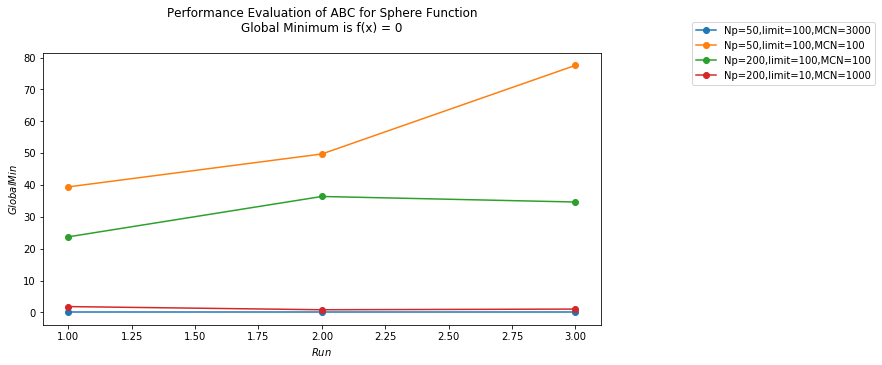

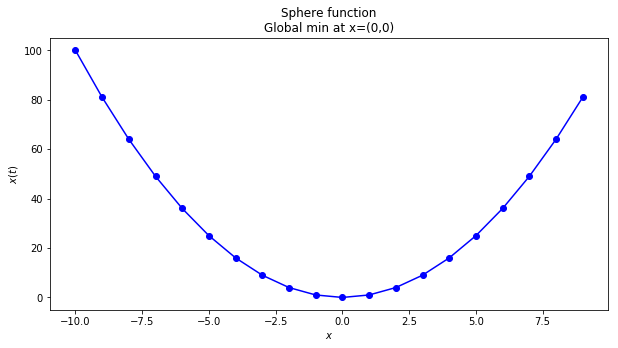

In [10]:
# Plot graph for Sphere function
legend =["Np=50,limit=100,MCN=3000","Np=50,limit=100,MCN=100","Np=200,limit=100,MCN=100","Np=200,limit=10,MCN=1000"]
title ="Performance Evaluation of ABC for Sphere Function\nGlobal Minimum is f(x) = 0\n"
plot_graph(legend,title)

# PLot Sphere function
j=-10
x=np.arange(-10,10,1)
top =np.zeros(shape=[20])
sol =0.0
k=0
while(j<10):
    sol = j*j
    top[k]=sol
    j=j+1
    k=k+1   
fig = plt.figure(figsize=(10,5))
plt.plot(x, top,'-bo')
plt.xlabel('$x$')
plt.ylabel('$x(t)$')
plt.title("Sphere function\nGlobal min at x=(0,0)")
plt.show()

> All the plots show that, the performance of ABC algorithm mainly depends on the MCN (Maximum cycle number). The parameters SN (total pouplation and limit don't affect the performance of ABC algorithm to a greater extent. The performance of ABC algorithm is better when MCN is increased. 

> The plot show that the global minimum found by ABC algorithm for the benchmark function is closest to the actual global minimum for MCN values of 3000. The next closest value is for MCN =1000. Thus,higher the MCN value, better the performance of ABC algorithm 